In [1]:
# This notebook was adapted from the notebook used in the specialization in Reinforcement Learning 
# from Alberta University, available in Coursera

from experiment_util import *
import experiment_util

import sys
sys.path.append("../Common_RL")

from RL.agents import DynaQPlusAgentExperimental
from RL.environments import SimulatedEnv

def change_environment(env):
    env.map[2][-1] = 0  # opens another corridor on the other end of row 2

env = SimulatedEnv()
shape_env = (len(env.map), len(env.map[0]))

set_results_dir("results-goal") # from experiment_util

# IMPORTANT: all experiments are made with these classes
environment_class = SimulatedEnv
agent_class = DynaQPlusAgentExperimental


results-goal/


# About this Notebook

Common to all experiments in this notebook: 
- **agents** tested are **Dyna-Q** and **Dyna-Q+** with varied parameters
- **environment** is basicaly the *SimulatedEnv* with the default 5x7 map; the map has a single cell changed in some experiments
- **reward model** of the environment is *goal*, i.e. +1 when arrive in a goal cell, and 0 in all other steps

# 1. Dyna-Q in Static Environment

In [2]:

# Experiment parameters
experiment_parameters = {
    "num_runs" : 30,             # Number of times we run the experiment
    "num_episodes" : 40,         # Number of episodes per experiment
}

# Environment parameters 
env_parameters = {
    "count_visits" : False,
    "reward_option" : 'goal', 
    "allow_all_actions" : False
}

# Agent parameters
agent_parameters = {  
    "gamma": 0.95,
    "epsilon": 0.1, 
    "alpha" : 0.125,
    "planning_steps" : [0, 5, 50],    # The list of planning_steps we want to try
    "kappa" : 0.0,                    # To behave as Dyna-Q
    "model_option" : 'transition+',
    "default_q" : 0.0
}

run_episodes(environment_class, agent_class, 
    env_parameters, agent_parameters, experiment_parameters,
    'planning_steps', 
    'Dyna-Q_planning_steps.npy')

WITH planning_steps = 0


100%|██████████| 30/30 [00:08<00:00,  3.42it/s]


WITH planning_steps = 5


100%|██████████| 30/30 [00:04<00:00,  6.24it/s]


WITH planning_steps = 50


100%|██████████| 30/30 [00:19<00:00,  1.53it/s]


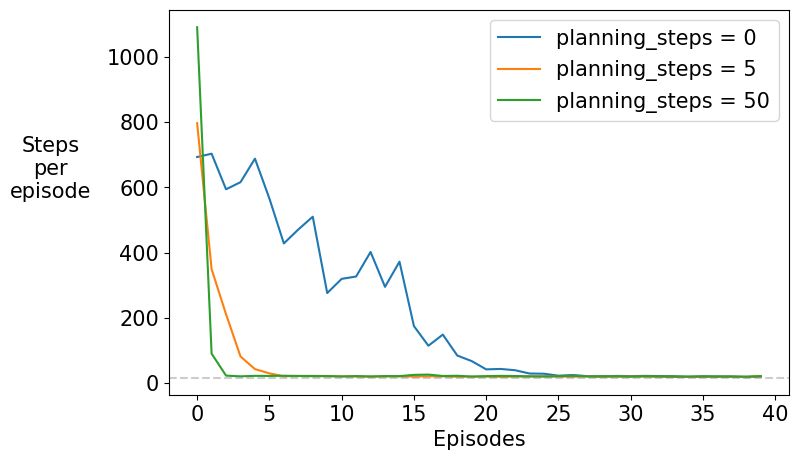

In [3]:
plot_steps_per_episode('Dyna-Q_planning_steps.npy')

# 2. Dyna-Q in Dynamic Environment

## 2.1 Experiment with Varying Planning Steps

In [4]:
# Experiment parameters
experiment_parameters = {
    "num_runs" : 10,                   # The number of times we run the experiment
    "num_max_steps" : 10000,           # The number of steps per experiment
    "count_visits" : True,
    "change_at_n" : 5000,                         # Time step where the environment will change
    "env_changer_procedure" : change_environment  # Procedure to change the environment 
}

# Environment parameters
environment_parameters = { 
    "count_visits" : False,
    "use_real_state" : True,
    "reward_option" : 'goal',
    "allow_all_actions" : False
}

# Agent parameters
agent_parameters = {  
    "epsilon": 0.1, 
    "gamma": 0.95,
    "alpha" : 0.125,
    "kappa" : 0.0,
    "planning_steps" : [5, 10, 50],             # The list of planning_steps we want to try
    "model_option" : 'transition+'              # With 'all' or 'transition': the lines are almost parallel
}

run_num_steps(environment_class, agent_class, 
    environment_parameters, agent_parameters, experiment_parameters,
    "planning_steps",
    "Dyna-Q_shortcut_steps")

WITH planning_steps = 5


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


WITH planning_steps = 10


100%|██████████| 10/10 [00:10<00:00,  1.06s/it]


WITH planning_steps = 50


100%|██████████| 10/10 [00:32<00:00,  3.22s/it]


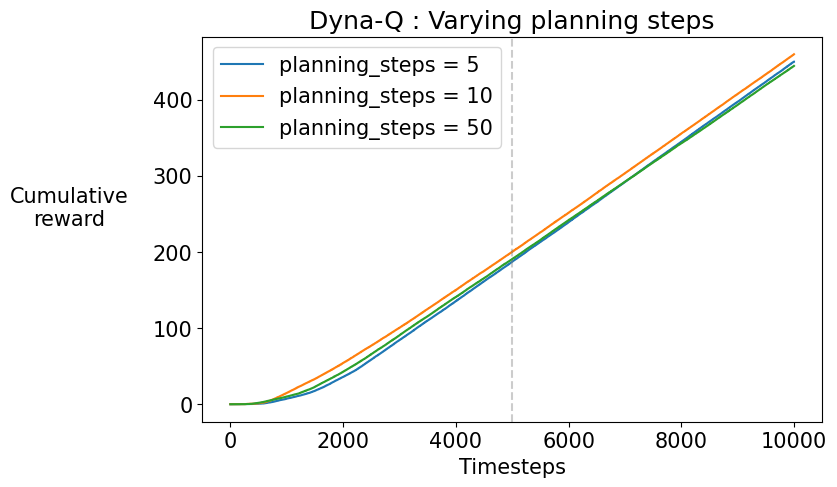

In [5]:
plot_results_per_step('Dyna-Q_shortcut_steps.npy', 
    'Dyna-Q : Varying planning steps', 
    'cum_reward_all')

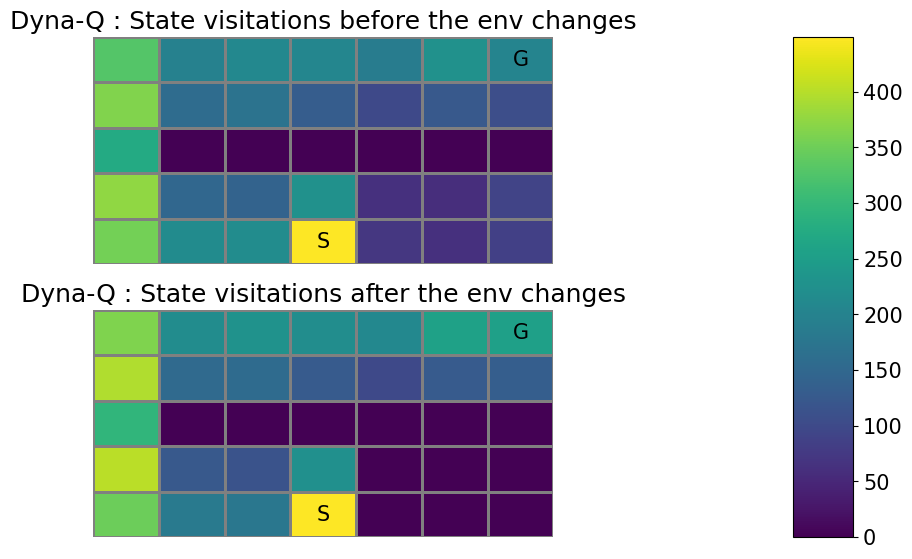

In [6]:
plot_state_visitations(
    "Dyna-Q_shortcut_steps.npy", 
    ['Dyna-Q : State visitations before the env changes', 'Dyna-Q : State visitations after the env changes'],
    2, shape_env) # index 2 is Dyna-Q with 50 planning steps


## 2.2 Experiment with Varying Epsilons

In [7]:
# Experiment parameters
experiment_parameters = {
    "num_runs" : 20, #30,      # The number of times we run the experiment
    "num_max_steps" : 10000,   # The number of steps per experiment
    "count_visits" : False,
    "change_at_n" : 5000,                         # Time step where the environment will change
    "env_changer_procedure" : change_environment  # Procedure to change the environment 
}

# Environment parameters
environment_parameters = { 
    "count_visits" : False,
    "use_real_state" : True,
    "reward_option" : 'goal',
    "allow_all_actions" : False
}

# Agent parameters
agent_parameters = {  
    "alpha" : 0.125,
    "gamma": 0.95,
    "planning_steps" : 10,             # Obs.: with more steps, results are similar
    "kappa" : 0.0,
    "epsilon": [0.1, 0.2, 0.4, 0.8],   # The list of epsilons we want to try
    "model_option" : 'transition+'
}

run_num_steps(environment_class, agent_class, 
    environment_parameters, agent_parameters, experiment_parameters,
    'epsilon',
    'Dyna-Q_epsilons') #'''

WITH epsilon = 0.1


100%|██████████| 20/20 [00:19<00:00,  1.00it/s]


WITH epsilon = 0.2


100%|██████████| 20/20 [00:20<00:00,  1.00s/it]


WITH epsilon = 0.4


100%|██████████| 20/20 [00:22<00:00,  1.10s/it]


WITH epsilon = 0.8


100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


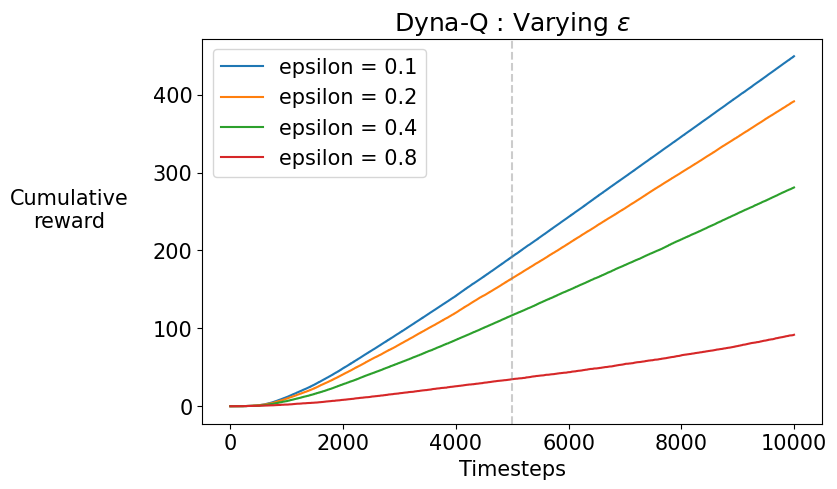

In [8]:
plot_results_per_step('Dyna-Q_epsilons.npy',
    r'Dyna-Q : Varying $\epsilon$',
    'cum_reward_all')

# 3. Dyna-Q+ in Dynamic Environment

In [9]:
# Experiment parameters
experiment_parameters = {
    "num_runs" : 30,                     # The number of times we run the experiment
    "num_max_steps" : 10000,             # The number of steps per experiment
    "count_visits" : True,
    "change_at_n" : 5000,                         # Time step where the environment will change
    "env_changer_procedure" : change_environment  # Procedure to change the environment 
}

# Environment parameters
environment_parameters = { 
    "count_visits" : False,
    "use_real_state" : True,
    "reward_option" : 'goal', 
    "allow_all_actions" : False
}

# Agent parameters
agent_parameters = {  
    "gamma": 0.95,
    "epsilon": 0.1, 
    # parametrizacao obtida com o Optuna em ambiente estatico e adaptada 
    # (foi melhor do que a de ambiente dinamico)
    "alpha" : 0.70,                 # best: 0.87
    "planning_steps" : [30, 50],    # may add other values
    "kappa" : 0.00050,              # bem ajustado: mudanças +- 0.00010 pioram
    "model_option" : 'transition+'
}


In [10]:
run_num_steps(environment_class, agent_class, 
    environment_parameters, agent_parameters, experiment_parameters,
    "planning_steps",
    "Dyna-Q+")

WITH planning_steps = 30


100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


WITH planning_steps = 50


100%|██████████| 30/30 [01:40<00:00,  3.36s/it]


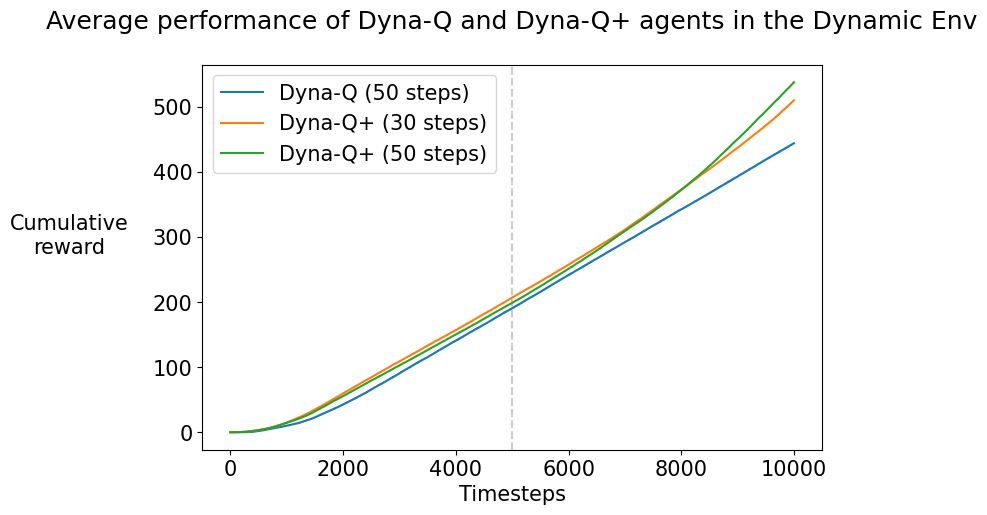

In [11]:
plot_results_comparison(
    'Dyna-Q_shortcut_steps.npy', 
    'Dyna-Q+.npy', 
    agent_parameters['planning_steps'])

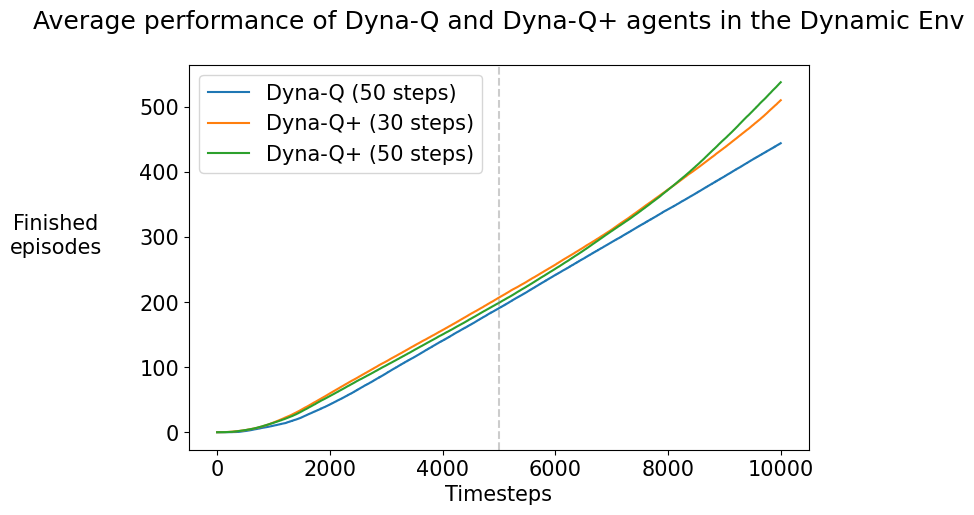

In [12]:
# Same graph as above (because reward option is set to 'goal')
plot_results_comparison(
    'Dyna-Q_shortcut_steps.npy', 
    'Dyna-Q+.npy', 
     agent_parameters['planning_steps'],
    'finished_episodes')

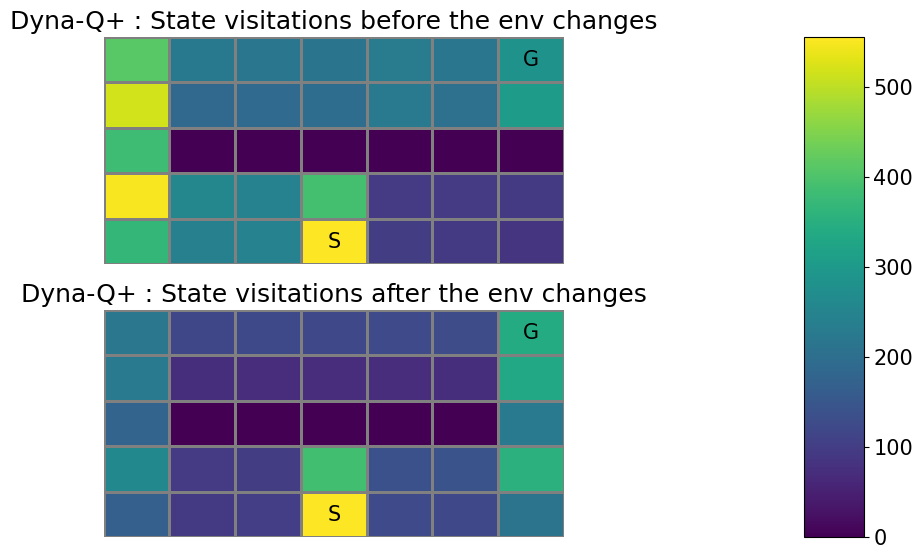

In [13]:
plot_state_visitations(
    'Dyna-Q+.npy', 
    ['Dyna-Q+ : State visitations before the env changes', 
    'Dyna-Q+ : State visitations after the env changes'], 
    len(agent_parameters['planning_steps'])-1,   # last index: DynaQ+ with the most steps
    shape_env)  